<a href="https://colab.research.google.com/github/JacquelineMartinez-git/ml-gbm-prediction-capstone/blob/main/GBM_Risk_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# upload files

from google.colab import files

uploaded = files.upload()

Saving TCGA_GBM_LGG_Mutations_all.csv to TCGA_GBM_LGG_Mutations_all.csv
Saving TCGA_InfoWithGrade.csv to TCGA_InfoWithGrade.csv


In [2]:
import pandas as pd

# loading datasets
df_mutations = pd.read_csv("TCGA_GBM_LGG_Mutations_all.csv")
df_info = pd.read_csv("TCGA_InfoWithGrade.csv")

# checking first few rows
df_mutations.head(), df_info.head()

(  Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
 0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
 1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
 2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
 3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
 4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   
 
          Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
 0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
 1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
 2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
 3  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
 4  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
 
          FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
 0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
 1  NOT_

In [3]:
# prints how many rows and columns there are
print("Mutations Dataset Shape:", df_mutations.shape)
print("Info Dataset Shape:", df_info.shape)

# see which columns are available
print("\nMutations Columns:", df_mutations.columns.tolist())
print("Info Columns:", df_info.columns.tolist())

# get info on data types
df_mutations.info()
df_info.info()

Mutations Dataset Shape: (862, 27)
Info Dataset Shape: (839, 24)

Mutations Columns: ['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
Info Columns: ['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 n

In [4]:
# checking for missing values
print("Missing values in Mutations dataset:", df_mutations.isnull().sum())
print("\nMissing values in Info dataset:", df_info.isnull().sum())

Missing values in Mutations dataset: Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

Missing values in Info dataset: Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1    

In [5]:
print(df_mutations.columns)
print(df_info.columns)

Index(['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis',
       'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')
Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')


In [6]:
# comparing unique values for "Grade" in both datasets
print("Unique Grades in Mutations Dataset:", df_mutations["Grade"].unique())
print("Unique Grades in Info Dataset:", df_info["Grade"].unique())

# comparing unique values for "Gender" in both datasets
print("Unique Grades in Mutations Dataset:", df_mutations["Gender"].unique())
print("Unique Grades in Info Dataset:", df_info["Gender"].unique())

# omparing number of unique patients (if possible)
print("Number of Unique Age_at_diagnosis in Mutations Dataset:", df_mutations["Age_at_diagnosis"].nunique())
print("Number of Unique Age_at_diagnosis in Info Dataset:", df_info["Age_at_diagnosis"].nunique())

Unique Grades in Mutations Dataset: ['LGG' 'GBM']
Unique Grades in Info Dataset: [0 1]
Unique Grades in Mutations Dataset: ['Male' 'Female' '--']
Unique Grades in Info Dataset: [0 1]
Number of Unique Age_at_diagnosis in Mutations Dataset: 838
Number of Unique Age_at_diagnosis in Info Dataset: 766


In [7]:
# Info Dataset is processed from original "Mutations Dataset". Will use "Info" for ML training.

In [8]:
# Preparing dataset for ML training - feature and target selection

# define X (features) and y (target variable)
X = df_info.drop(columns=["Grade"]) # features: all columns excluding Grade
y = df_info["Grade"] # target variable: LGG (0) or GBM (1)

In [9]:
# Split data for model training and testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale numerical features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Training a Logistic Regression Model (Baseline Model)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# make predictions on test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8452380952380952
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        89
           1       0.80      0.89      0.84        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



In [11]:
# Training a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train_scaled, y_train)

# make predictions on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.81      0.84      0.82        79

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



In [12]:
# Training a Support Vector Model

from sklearn.svm import SVC

# initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)

# train the model
svm_model.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



In [13]:
# Training a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier

# initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# train the model
gb_model.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8511904761904762
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        89
           1       0.81      0.90      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168



In [14]:
# Training a Neural Network Model

from sklearn.neural_network import MLPClassifier

# initialize the MLP Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# train the model
nn_model.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.8214285714285714
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        89
           1       0.80      0.82      0.81        79

    accuracy                           0.82       168
   macro avg       0.82      0.82      0.82       168
weighted avg       0.82      0.82      0.82       168



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Notes: Chose Gradient Boosting Model because it has one of the highest accuracies and it is a solid foundation to be fine tuned given feature importance **

In [15]:
# Hyperparameter Tuning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# define the model
gb = GradientBoostingClassifier(random_state=42)

# define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# setup Grid Search
grid = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid.best_score_))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.87


In [16]:
# Initialize and Train Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier with the best parameters
gb_final = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model on the full training data
gb_final.fit(X_train_scaled, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=42)

In [17]:
# Evaluating Performance of Trained Gradient Boosting Classifier

from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_final = gb_final.predict(X_test_scaled)

# Calculate accuracy and display the classification report
print("Final Model Accuracy on Test Set:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Final Model Accuracy on Test Set: 0.8452380952380952
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        89
           1       0.79      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



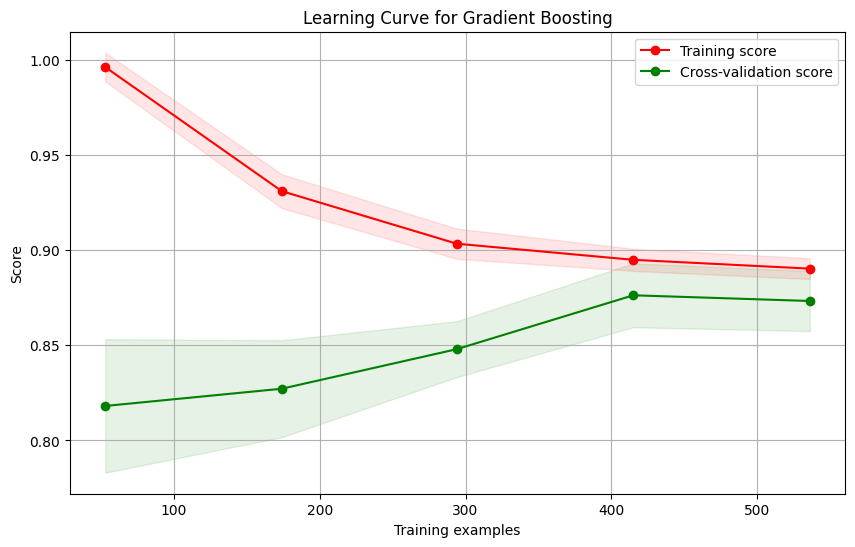

In [18]:
# Checking for Overfitting

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier

gb_final = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# plot learning curve
plot_learning_curve(gb_final, "Learning Curve for Gradient Boosting", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()

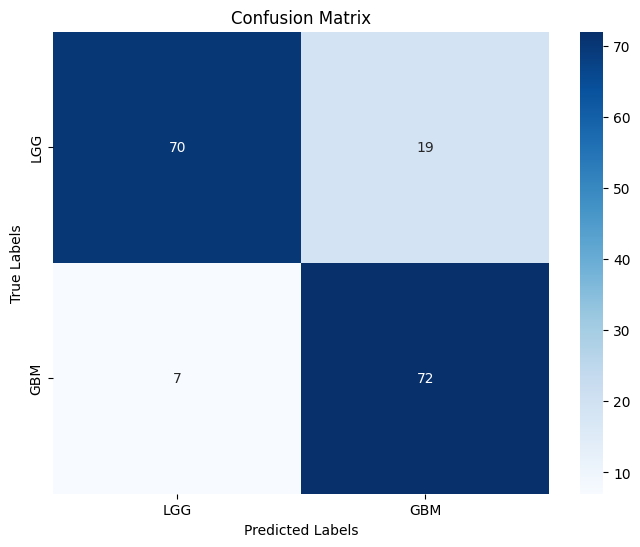

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['LGG', 'GBM'], yticklabels=['LGG', 'GBM'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()